In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

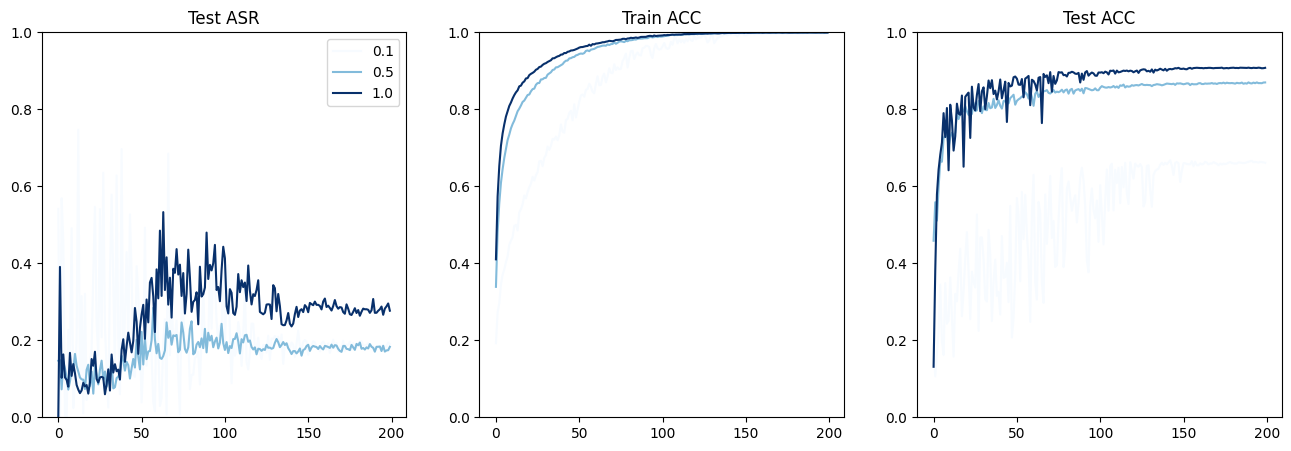

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.2, 0.3, 0.4, 0.6, 0.7]
train_sizes = [0.1, 0.5, 1.0]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)

for i, train_size in enumerate(train_sizes):
    d = torch.load(f"outputs/resnet18_sgd/resnet18_sgd_200_0.01_{train_size}.pt")

    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

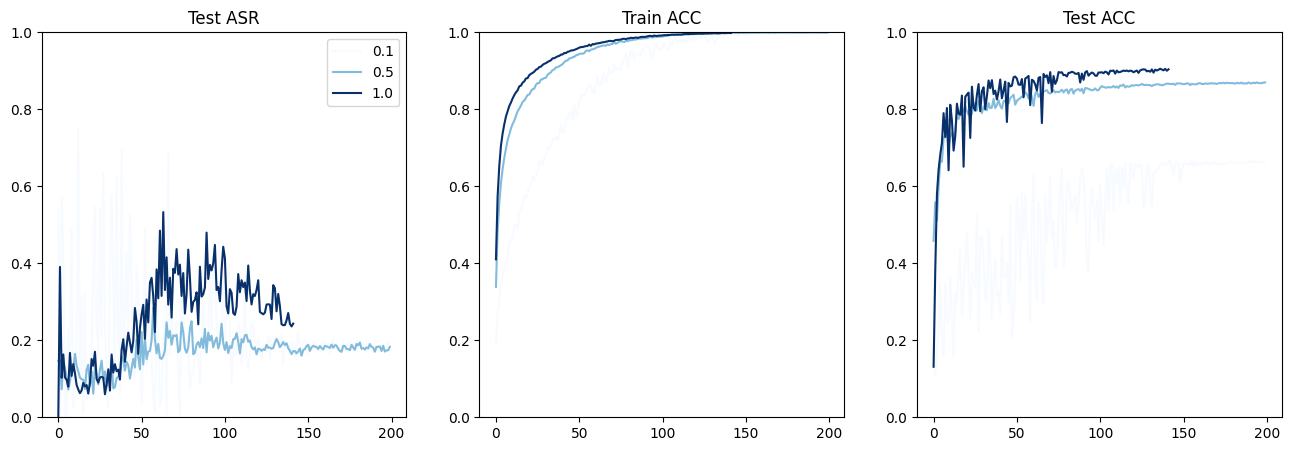

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.2, 0.3, 0.4, 0.6, 0.7]
train_sizes = [0.1, 0.5, 1.0]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)

for i, train_size in enumerate(train_sizes):
    d = torch.load(f"outputs/resnet18_sgd/resnet18_sgd_200_0.01_{train_size}.pt")

    args = d['args']
    # print(len(args['trainset_kept_indices']))
    # print(len(args['train_poison_indices']))
    # for j in args['train_poison_indices']:
    #     assert j in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])

    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

FileNotFoundError: [Errno 2] No such file or directory: 'logs/resnet18_sgd_200_0.05_0.1.pt'

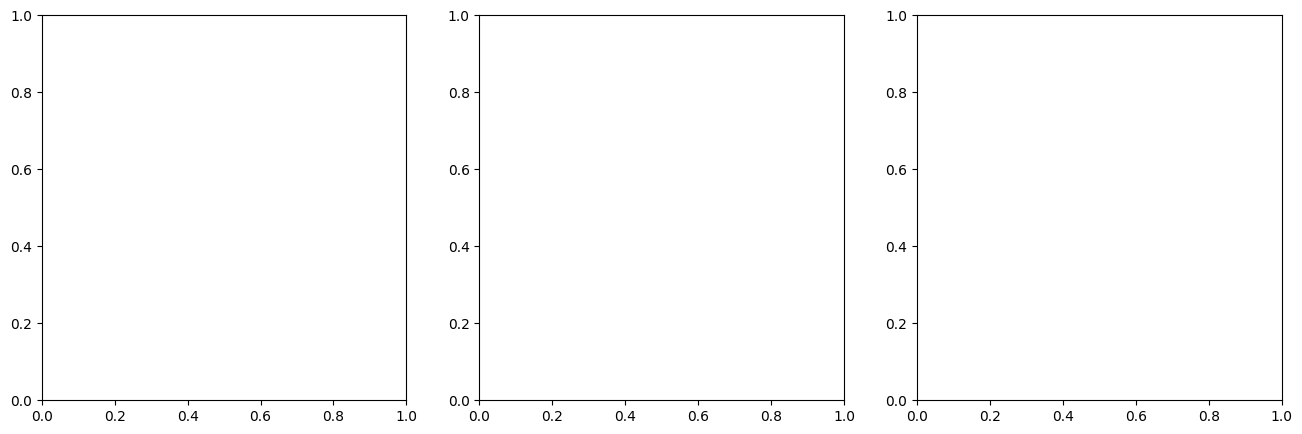

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_sizes = [0.1, 0.5, 1.0]
norm_sizes = (train_sizes - np.min(train_sizes)) / (np.max(train_sizes) - np.min(train_sizes))
cmap = plt.get_cmap('Blues')
colors = cmap(norm_sizes)
best_asr = {}
for i, train_size in enumerate(train_sizes):
    # d = torch.load(f"logs/resnet_nonaug_adam0.001/resnet18_100_0.005_{train_size:0.1f}.pt")
    # d = torch.load(f"logs/resnet_nonaug_adam0.001/resnet18_100_0.005_{train_size:0.1f}.pt")
    d = torch.load(f"logs/resnet18_sgd_200_0.05_{train_size:0.1f}.pt")

    args = d['args']
    print(args['poisoning_rate'])
    print(len(args['trainset_kept_indices']))
    print(len(args['train_poison_indices']))
    # for i in args['train_poison_indices']:
    #     assert i in args['trainset_kept_indices']
    df = pd.DataFrame(data=d['stats'])
    best_asr[train_size] = df['test_asr'].values[-1]

    axes[0].plot(df.test_asr, label=f"{train_size:0.1f}", color=colors[i])
    axes[1].plot(df.train_acc, label=f"{train_size:0.1f}", color=colors[i])
    axes[2].plot(df.test_clean_acc, label=f"{train_size:0.1f}", color=colors[i])
     
    axes[0].set_ylim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.0])
    axes[2].set_ylim([0.0, 1.0])
    

    axes[0].set_title("Test ASR")
    axes[1].set_title("Train ACC")
    axes[2].set_title("Test ACC")
axes[0].legend()

(0.0, 1.0)

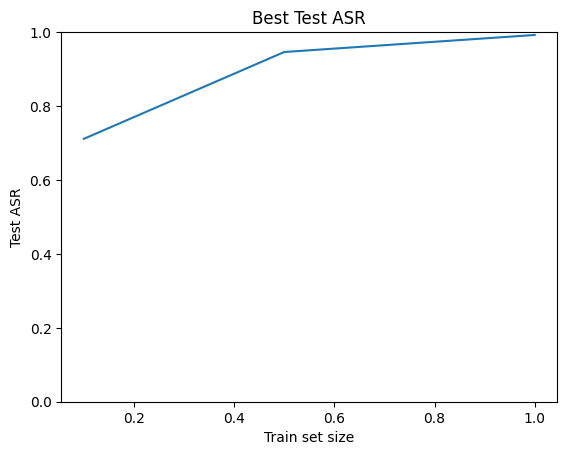

In [14]:
plt.plot(best_asr.keys(), best_asr.values())
plt.title("Best Test ASR")
plt.xlabel("Train set size")
plt.ylabel("Test ASR")
plt.ylim([0.0, 1.0])